In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("Titanic-Dataset.csv")
data = data.drop(columns=["Name", "Ticket", "Cabin"])
data = data.dropna()
data["Sex"] = data["Sex"].apply(lambda x: 0 if x == "male" else 1)
embarkation_codes = {"C":0, "Q":1, "S":2}
data["Embarked"] = data["Embarked"].apply(lambda x: embarkation_codes.get(x, 3))
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
885,886,0,3,1,39.0,0,5,29.1250,1
886,887,0,2,0,27.0,0,0,13.0000,2
887,888,1,1,1,19.0,0,0,30.0000,2
889,890,1,1,0,26.0,0,0,30.0000,0


## First Check for Correlations between each column and survived


<Axes: >

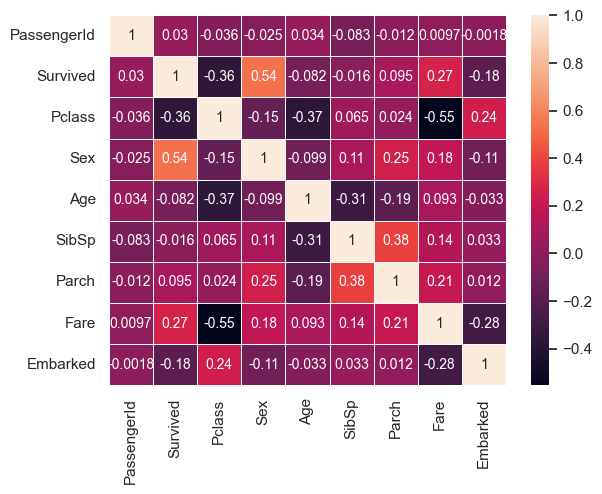

In [3]:
sns.heatmap(data.corr(), linewidths=0.5, annot=True, annot_kws={"size": 10})

## Plot 2 Dimensional PCA 
???

/var/folders/q7/6y138xkd6zv6br9n2kwjwbm40000gn/T/ipykernel_21285/3532982182.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


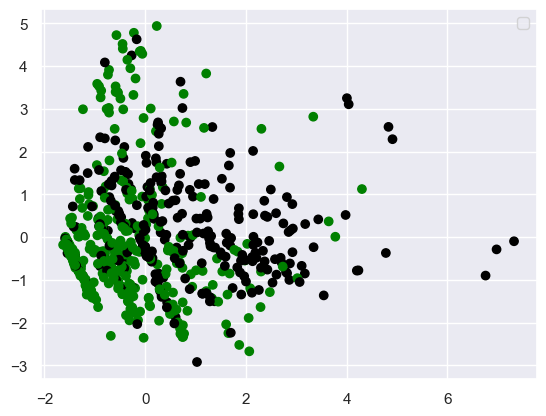

In [9]:
pca = PCA(2)
features = data.drop("Survived", axis=1).to_numpy()
scaler= StandardScaler()
scaled_features = scaler.fit_transform(features)
x, y = pca.fit_transform(scaled_features).T
plt.scatter(x,y, c=["black" if i else "green" for i in data["Survived"]])
plt.legend()

PearsonRResult(statistic=-0.13885094713813445, pvalue=0.000201991530435307)


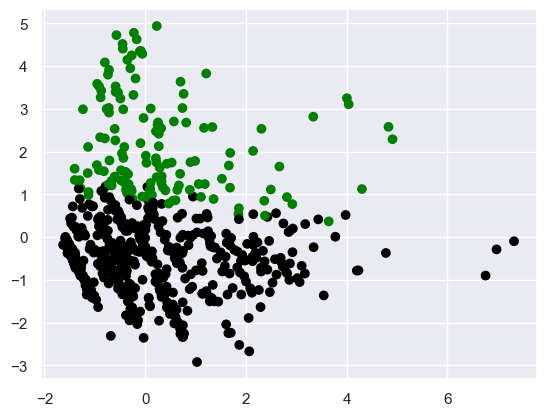

In [5]:
kmeans = KMeans(2)
pred = kmeans.fit_predict(scaled_features)
print(pearsonr(pred, data["Survived"]))
plt.scatter(x, y, c=["black" if i else "green" for i in pred])

## Logistic Regression to predict survival

In [6]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(scaled_features, data["Survived"], test_size=0.25, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

#Logistic Regression
logreg = LogisticRegression(penalty=None, fit_intercept=True, max_iter=1000, tol=0.000001)
logreg.fit(x_train, y_train)
print("Percent Correct:", logreg.score(x_test, y_test))

#Logistic Regression with L2 Regularization
logreg = LogisticRegression(fit_intercept=True, max_iter=1000, tol=0.000001)
logreg.fit(x_train, y_train)
print("Percent Correct:", logreg.score(x_test, y_test))


(534, 8) (178, 8) (534,) (178,)
Percent Correct: 0.7808988764044944
Percent Correct: 0.7921348314606742


In [12]:
logreg = LogisticRegressionCV(random_state=42)
logreg.fit(x_train, y_train)
print("Percent Correct:", logreg.score(x_test, y_test))

Percent Correct: 0.7921348314606742


## Decision Tree

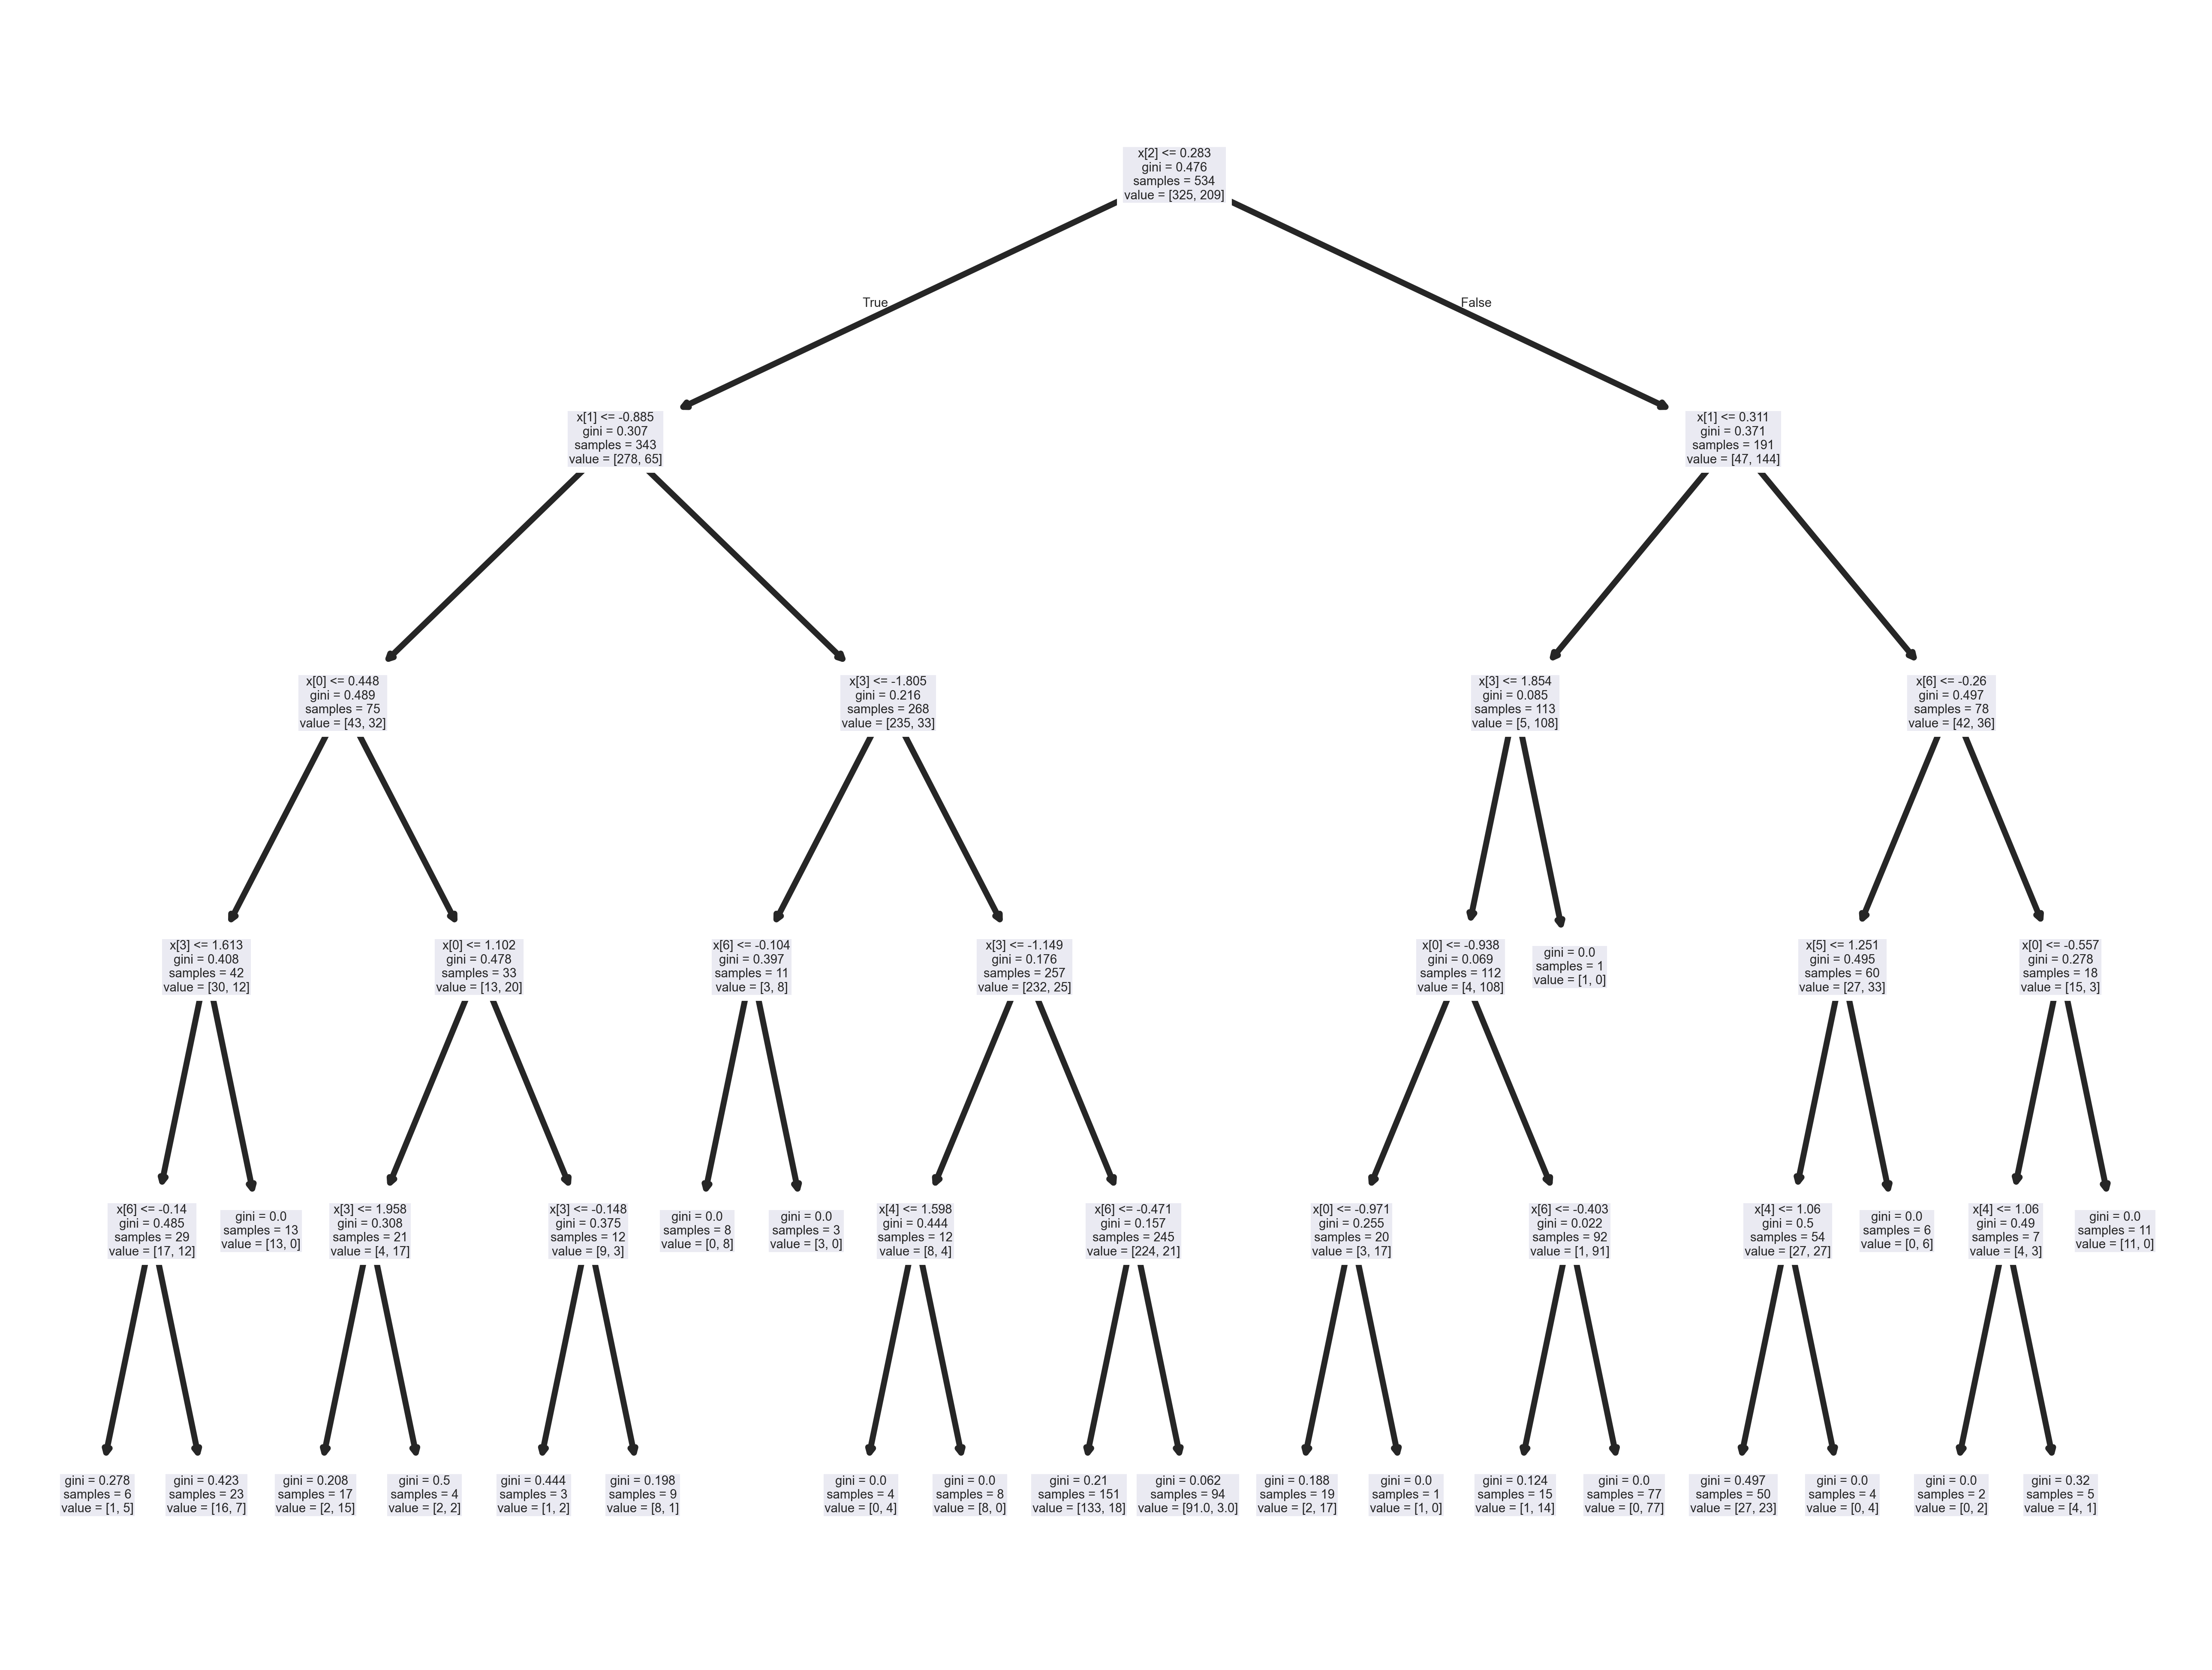

Percent Correct: 0.702247191011236


In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(x_train, y_train)
plt.figure(dpi=1000)
trash = plot_tree(clf)
plt.show()
print("Percent Correct:", clf.score(x_test, y_test))


In [31]:
for depth in range(1,21):
    clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
    clf.fit(x_train, y_train)
    print(f"Percent Correct at Depth {depth}:", clf.score(x_test, y_test))

Percent Correct at Depth 1: 0.7471910112359551
Percent Correct at Depth 2: 0.7584269662921348
Percent Correct at Depth 3: 0.7528089887640449
Percent Correct at Depth 4: 0.7134831460674157
Percent Correct at Depth 5: 0.702247191011236
Percent Correct at Depth 6: 0.7471910112359551
Percent Correct at Depth 7: 0.7528089887640449
Percent Correct at Depth 8: 0.7415730337078652
Percent Correct at Depth 9: 0.7078651685393258
Percent Correct at Depth 10: 0.7134831460674157
Percent Correct at Depth 11: 0.6910112359550562
Percent Correct at Depth 12: 0.7078651685393258
Percent Correct at Depth 13: 0.6741573033707865
Percent Correct at Depth 14: 0.6685393258426966
Percent Correct at Depth 15: 0.6685393258426966
Percent Correct at Depth 16: 0.6629213483146067
Percent Correct at Depth 17: 0.6685393258426966
Percent Correct at Depth 18: 0.6910112359550562
Percent Correct at Depth 19: 0.6685393258426966
Percent Correct at Depth 20: 0.6685393258426966


## Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train)
print(f"Percent Correct:", rfc.score(x_test, y_test))

Percent Correct: 0.7865168539325843
